# GOAL

The goal of this challenge is:

1) to build a model that predicts conversion rate.

2) based on the model, come up with ideas to improve it.

# ChanChallenge Description


1)Predict conversion rate

2)Come up with recommendations for the product team and the marketing team to improve conversion rate

# Data

country : user country based on the IP address

age : user age. Self-reported at sign-up step

new_user : whether the user created the account during this session or had already an account and simply came back to the site

source : marketing channel source

   Ads: came to the site by clicking on an advertisement
   
   Seo: came to the site by clicking on search results
   
   Direct: came to the site by directly typing the URL on the browser

total_pages_visited: number of total pages visited during the session. This can be seen as a proxy for time spent on site and                        engagement

converted: this is our label. 1 means they converted within the session, 0 means they left without buying anything. 

# Data Processing

In [1]:
import pandas as pd
import numpy as np
import re
conversiondata=pd.read_csv('conversion_data.csv')
conversiondata.head()   #5rows

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [2]:
conversiondata.info()
#amazonreview=amazonreview.replace(' ',np.NaN)
#amazonreview[:2]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [3]:
conversiondata.count()
#len(conversiondata.columns)

country                316200
age                    316200
new_user               316200
source                 316200
total_pages_visited    316200
converted              316200
dtype: int64

In [4]:
conversiondata.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [5]:
conversiondata.age.unique() #get array
#note: way 2: conversiondata.age.unique().tolist() #get list

array([ 25,  23,  28,  39,  30,  31,  27,  29,  38,  43,  24,  36,  37,
        33,  20,  35,  17,  50,  22,  18,  34,  19,  42,  32,  21,  48,
        40,  41,  26,  45,  44,  49,  46,  56,  52,  54,  51,  47,  53,
        60,  57,  55,  59,  61,  58,  62,  65,  63,  66,  67,  64,  68,
        69, 123,  70,  73,  77,  72,  79, 111], dtype=int64)

In [6]:
#sorted(conversiondata.age.unique(), reverse=True) #default is ascending order
#conversiondata.age.unique().sort()

In [7]:
sorted(conversiondata.age.unique(), reverse=True) #default is ascending order
#conversiondata.age.unique().sort() not worked ??
#conversiondata[conversiondata['age'] > 79]
#conversiondata=conversiondata[conversiondata['age'] < 100].count()


[123,
 111,
 79,
 77,
 73,
 72,
 70,
 69,
 68,
 67,
 66,
 65,
 64,
 63,
 62,
 61,
 60,
 59,
 58,
 57,
 56,
 55,
 54,
 53,
 52,
 51,
 50,
 49,
 48,
 47,
 46,
 45,
 44,
 43,
 42,
 41,
 40,
 39,
 38,
 37,
 36,
 35,
 34,
 33,
 32,
 31,
 30,
 29,
 28,
 27,
 26,
 25,
 24,
 23,
 22,
 21,
 20,
 19,
 18,
 17]

In [8]:
conversiondata[conversiondata['age'] > 79]
#conversiondata=conversiondata[conversiondata['age'] < 100].count()

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [9]:
conversiondata=conversiondata[conversiondata['age'] < 100]
conversiondata[:5]

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [10]:
conversiondata.groupby(['country','total_pages_visited'])

In [11]:
conversiondata.groupby(['country','total_pages_visited']).first()

age  new_user  source  converted
country total_pages_visited                                  
China   1                     30         0     Seo          0
        2                     35         1     Ads          0
        3                     27         1     Ads          0
        4                     27         1     Seo          0
        5                     39         1     Seo          0
        6                     31         0     Seo          0
        7                     39         1  Direct          0
        8                     22         1     Seo          0
        9                     36         0  Direct          0
        10                    21         0     Ads          0
        11                    50         1  Direct          0
        12                    24         1  Direct          0
        13                    23         1     Seo          0
        14                    17         1  Direct          0
        15                    27         1     Ads          0
        16                    36         1     Ads          0
        17                    32         1     Ads          0
        18                    21         1     Seo          0
        19                    35         0     Ads          1
        20                    36         0     Seo          0
        22                    28         1  Direct          1
        24                    44         0  Direct          1
        26                    22         0  Direct          1
Germany 1                     17         0     Seo          0
        2                     32         1  Direct          0
        3                     20         1     Seo          0
        4                     34         0     Seo          0
        5                     19         1  Direct          0
        6                     39         1     Ads          0
        7                     28         1     Ads          0
...                          ...       ...     ...        ...
UK      27                    21         1  Direct          1
US      1                     31         0     Seo          0
        2                     25         0     Ads          0
        3                     39         0     Seo          0
        4                     28         1     Seo          0
        5                     23         1     Seo          0
        6                     30         1     Seo          0
        7                     27         1     Ads          0
        8                     43         1  Direct          0
        9                     33         1     Ads          0
        10                    36         1  Direct          0
        11                    33         0     Seo          0
        12                    38         0     Seo          1
        13                    37         1  Direct          0
        14                    35         1     Seo          0
        15                    33         0     Seo          1
        16                    19         0     Ads          1
        17                    35         0     Seo          1
        18                    25         1  Direct          1
        19                    18         0  Direct          1
        20                    44         1  Direct          1
        21                    17         0     Seo          1
        22                    23         1  Direct          1
        23                    21         0     Seo          1
        24                    21         0     Seo          1
        25                    17         0  Direct          1
        26                    25         0  Direct          1
        27                    24         0     Seo          1
        28                    17         1  Direct          1
        29                    33         0  Direct          1

[106 rows x 4 columns]

In [12]:
conversiondata.groupby(['country','age']).first()

new_user  source  total_pages_visited  converted
country age                                                  
China   17          1     Seo                    4          0
        18          1     Ads                    3          0
        19          1  Direct                    2          0
        20          1     Ads                    6          0
        21          0     Ads                   10          0
        22          1     Seo                    8          0
        23          1     Ads                    3          0
        24          1     Seo                    5          0
        25          0     Seo                    3          0
        26          0     Seo                    7          0
        27          1     Seo                    4          0
        28          1     Seo                    1          0
        29          1     Ads                    6          0
        30          0     Seo                    1          0
        31          0     Seo                    6          0
        32          0     Seo                    3          0
        33          0  Direct                    5          0
        34          1  Direct                    4          0
        35          1     Ads                    2          0
        36          0  Direct                    9          0
        37          0     Ads                    6          0
        38          1     Seo                    2          0
        39          1     Seo                    5          0
        40          0     Seo                    1          0
        41          0     Seo                    4          0
        42          1     Ads                    7          0
        43          1  Direct                    5          0
        44          1     Seo                    3          0
        45          1     Seo                    2          0
        46          1     Ads                    1          0
...               ...     ...                  ...        ...
US      45          1  Direct                    8          0
        46          0     Seo                    1          0
        47          1     Seo                    1          0
        48          1     Ads                    3          0
        49          1     Ads                    6          0
        50          1     Seo                    1          0
        51          0  Direct                    1          0
        52          1     Seo                    2          0
        53          0     Seo                    2          0
        54          1     Seo                    2          0
        55          1     Seo                    4          0
        56          0     Seo                   10          0
        57          1  Direct                    3          0
        58          1     Ads                    3          0
        59          0  Direct                    6          0
        60          1     Seo                    3          0
        61          1  Direct                    6          0
        62          1     Ads                    1          0
        63          0  Direct                    2          0
        64          0  Direct                    3          0
        65          1     Ads                    2          0
        66          1     Seo                    2          0
        67          1     Seo                    3          0
        68          1     Seo                    7          0
        69          1     Seo                    6          0
        70          1     Ads                    9          0
        72          1  Direct                    4          0
        73          1     Seo                    5          0
        77          0  Direct                    4          0
        79          1  Direct                    1          0

[209 rows x 4 columns]

In [13]:
conversiondata.shape

(316198, 6)

In [14]:
conversiondata[:5]

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.boxplot(conversiondata.iloc[:,[1,4]], orient='vertical')
#plt.show()
count = 0
col_num = 1

#plt.subplots(n_rows, n_cols)
for i in range(conversiondata.shape[1]):
    sns.boxplot(conversiondata.iloc[:, col_num], orient='vertical')
    if col_num < conversiondata.shape[1] :
        count += 1
        col_num+= 1

plt.show()

TypeError: cannot perform reduce with flexible type

C:\Users\wenfe\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


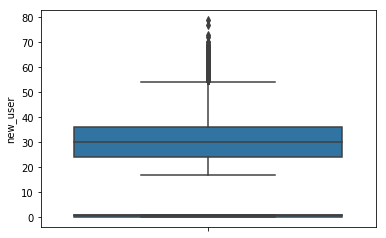

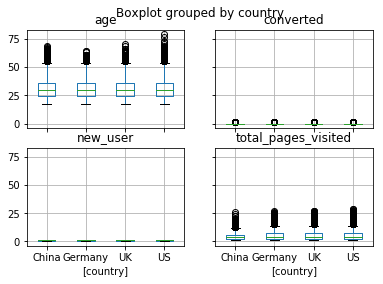

In [16]:
import matplotlib.pyplot as plt
conversiondata.boxplot(by='country')
plt.show()

C:\Users\wenfe\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


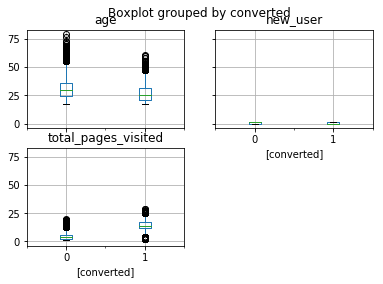

In [17]:
conversiondata.boxplot(by='converted')
plt.show()

In [18]:
conversiondata.groupby('country').size().to_frame().reset_index()

,country,0
0,China,76602
1,Germany,13055
2,UK,48449
3,US,178092


In [19]:
#compute the sta using groupby way1
conversiondatagb=conversiondata.groupby('country').agg({'converted':[np.mean]}).reset_index()
#agg({'converted':[sum,min,max,np.mean,np.median,np.std]}
#retruned nested column name
conversiondatagb

,country,converted
,,mean
0,China,0.001332
1,Germany,0.062428
2,UK,0.052612
3,US,0.037801


In [20]:
conversiondata.groupby('country').agg({'converted':[np.mean]}).rename(columns={'converted':'convertrate'}).reset_index()

,country,convertrate
,,mean
0,China,0.001332
1,Germany,0.062428
2,UK,0.052612
3,US,0.037801


In [21]:
conversiondata.groupby('country')['converted'].agg({'cc':lambda x: np.mean}).reset_index()

C:\Users\wenfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,country,cc
0,China,<function mean at 0x0000018C5286BD08>
1,Germany,<function mean at 0x0000018C5286BD08>
2,UK,<function mean at 0x0000018C5286BD08>
3,US,<function mean at 0x0000018C5286BD08>


In [22]:
grouppedcountry=conversiondata[['country', 'converted']].groupby('country').mean().reset_index()
grouppedcountry

,country,converted
0,China,0.001332
1,Germany,0.062428
2,UK,0.052612
3,US,0.037801


In [23]:
#compute the sta using groupby way1
conversiondatagb=conversiondata.groupby('country').agg({'converted':[np.mean]}).reset_index()
#agg({'converted':[sum,min,max,np.mean,np.median,np.std]}
#retruned nested column name
print(conversiondatagb)
conversiondatagb['rate']=conversiondatagb.iloc[:,1]
print(conversiondatagb)
conversiondatagb1=conversiondatagb[['country','rate']]
conversiondatagb1

   country converted
                mean
0    China  0.001332
1  Germany  0.062428
2       UK  0.052612
3       US  0.037801
   country converted      rate
                mean          
0    China  0.001332  0.001332
1  Germany  0.062428  0.062428
2       UK  0.052612  0.052612
3       US  0.037801  0.037801


,country,rate
,,
0,China,0.001332
1,Germany,0.062428
2,UK,0.052612
3,US,0.037801


In [24]:
conversiondata.boxplot(by='country')

C:\Users\wenfe\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018C5F27BBA8>,
      dtype=object)

C:\Users\wenfe\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


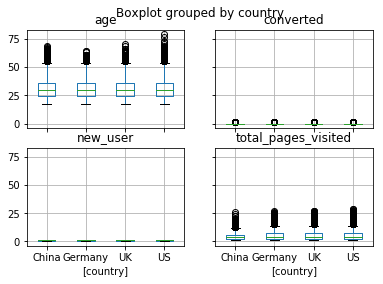

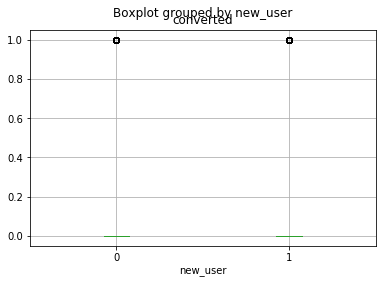

In [25]:
import matplotlib.pyplot as plt
conversiondata['new_user']=conversiondata.new_user.astype(str)
conversiondata.boxplot(by='new_user',column='converted')
plt.show()

In [26]:
import matplotlib.pyplot as plt
conversiondata.boxplot(column='total_pages_visited',by='country')

C:\Users\wenfe\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


In [27]:
import matplotlib.pyplot as plt
conversiondatagb1.plot(kind='bar',label='country',x='country', y='rate',color='grbc')
#plt.show()

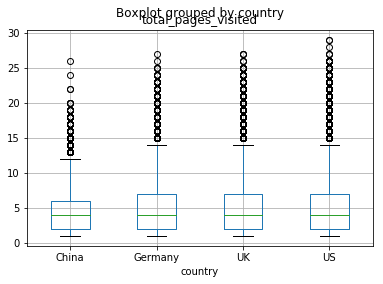

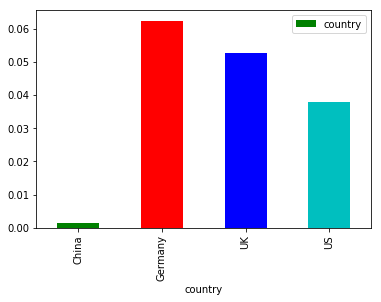

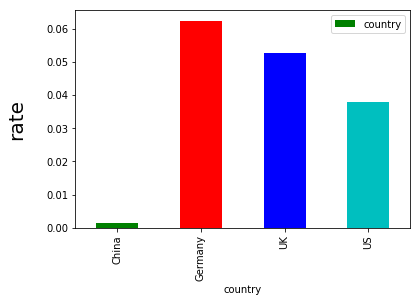

In [28]:
conversiondatagb1.plot(kind='bar',label='country',x='country', y='rate',color='grbc')\
.set_ylabel('rate', rotation='vertical', fontsize=20, labelpad=20)
plt.legend()
plt.show()
#vertical can change to 90;'horizontal' ==0

In [29]:
#compute the sta using groupby way1
conversiondatagbpage=conversiondata.groupby('total_pages_visited').agg({'converted':[np.mean]}).reset_index()
print(conversiondatagbpage[:10])
conversiondatagbpage['rate']=conversiondatagbpage.iloc[:,1]
#conversiondatagbpage
conversiondatagb2=conversiondatagbpage[['total_pages_visited','rate']]
print(conversiondatagb2)

  total_pages_visited converted
                           mean
0                   1  0.000000
1                   2  0.000228
2                   3  0.000251
3                   4  0.000780
4                   5  0.001570
5                   6  0.003437
6                   7  0.006769
7                   8  0.015238
8                   9  0.033067
9                  10  0.061068
   total_pages_visited      rate
                                
0                    1  0.000000
1                    2  0.000228
2                    3  0.000251
3                    4  0.000780
4                    5  0.001570
5                    6  0.003437
6                    7  0.006769
7                    8  0.015238
8                    9  0.033067
9                   10  0.061068
10                  11  0.123471
11                  12  0.244537
12                  13  0.400825
13                  14  0.587521
14                  15  0.740181
15                  16  0.871818
16                  17

In [ ]:
#grouped1 = conversiondata[['total_pages_visited', 'converted']].groupby('converted').first()
#print(grouped1)

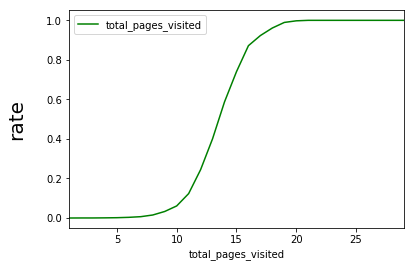

In [30]:
conversiondatagb2.plot(kind='line',label='total_pages_visited',x='total_pages_visited', y='rate',color='g')\
.set_ylabel('rate', rotation='vertical', fontsize=20, labelpad=20)
plt.legend()
plt.show()

In [31]:
import h2o
from h2o.frame import H2OFrame
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch
# Initialize H2O cluster
h2o.init()
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.171-b11, mixed mode)
  Starting server from C:\Users\wenfe\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\wenfe\AppData\Local\Temp\tmpkwhf4q88
  JVM stdout: C:\Users\wenfe\AppData\Local\Temp\tmpkwhf4q88\h2o_Sipu_started_from_python.out
  JVM stderr: C:\Users\wenfe\AppData\Local\Temp\tmpkwhf4q88\h2o_Sipu_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,05 secs
H2O cluster timezone:,America/Los_Angeles
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.2
H2O cluster version age:,7 months and 22 days !!!
H2O cluster name:,H2O_from_python_Sipu_y1i7c1
H2O cluster total nodes:,1
H2O cluster free memory:,1.740 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [32]:
# Transform to H2O Frame, and make sure the target variable is categorical
h2o_conversiondata = H2OFrame(conversiondata)

h2o_conversiondata['new_user'] = h2o_conversiondata['new_user'].asfactor()
h2o_conversiondata['converted'] = h2o_conversiondata['converted'].asfactor()

h2o_conversiondata.summary()

Parse progress: |█████████████████████████████████████████████████████████| 100%


,country,age,new_user,source,total_pages_visited,converted
type,enum,int,enum,enum,int,enum
mins,,17.0,,,1.0,
mean,,30.569311001334594,,,4.872918234777048,
maxs,,79.0,,,29.0,
sigma,,8.268957596421467,,,3.341053344215608,
zeros,,0,,,0,
missing,0,0,0,0,0,0
0,UK,25.0,1,Ads,1.0,0
1,US,23.0,1,Seo,5.0,0
2,US,28.0,1,Seo,4.0,0


In [33]:
# Split into 75% training and 25% test dataset
strat_split = h2o_conversiondata['converted'].stratified_split(test_frac=0.25, seed=42)

train = h2o_conversiondata[strat_split == 'train']
test = h2o_conversiondata[strat_split == 'test']

feature = ['country', 'age', 'new_user', 'source', 'total_pages_visited']
target = 'converted'

In [34]:
# Build random forest model
model = H2ORandomForestEstimator(balance_classes=True, ntrees=100, max_depth=20, 
                                 mtries=-1, seed=42, score_each_iteration=True)
model.train(x=feature, y=target, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


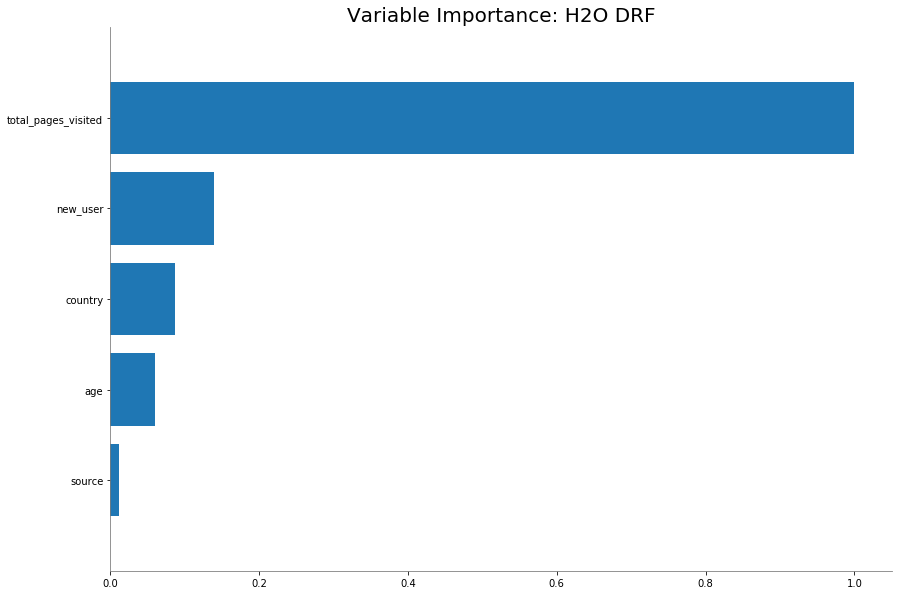

In [35]:
model.varimp_plot()

In [36]:
import seaborn as sns

              variable  relative_importance  scaled_importance  percentage
0  total_pages_visited         6.002840e+06           1.000000    0.769854
1             new_user         8.380371e+05           0.139607    0.107477
2              country         5.230291e+05           0.087130    0.067078
3                  age         3.621258e+05           0.060326    0.046442
4               source         7.133849e+04           0.011884    0.009149


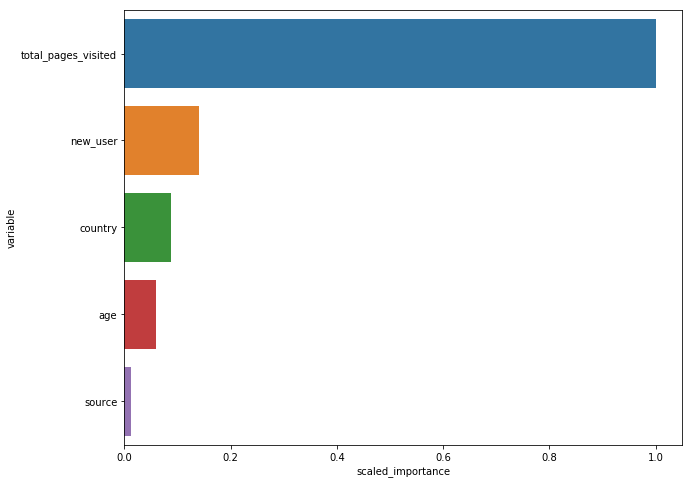

In [37]:
# Feature importance
importance = model.varimp(use_pandas=True)
print(importance)
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='scaled_importance', y='variable', data=importance)
plt.show()


In [38]:
from sklearn.metrics import auc, roc_curve, classification_report

In [39]:
# Make predictions
train_true = train.as_data_frame()['converted'].values
test_true = test.as_data_frame()['converted'].values
train_pred = model.predict(train).as_data_frame()['p1'].values
test_pred = model.predict(test).as_data_frame()['p1'].values

train_fpr, train_tpr, _ = roc_curve(train_true, train_pred)
test_fpr, test_tpr, _ = roc_curve(test_true, test_pred)
train_auc = np.round(auc(train_fpr, train_tpr), 3)
test_auc = np.round(auc(test_fpr, test_tpr), 3)

drf prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


In [ ]:
# Classification report
print(classification_report(y_true=test_true, y_pred=(test_pred > 0.5).astype(int)))

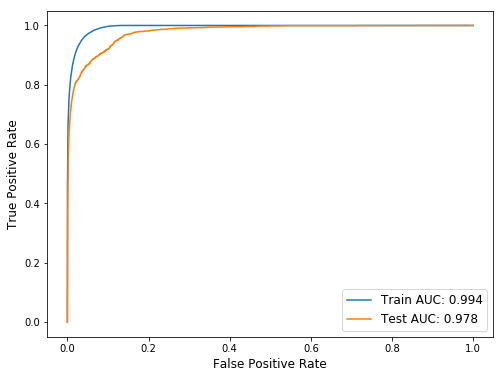

In [40]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(train_fpr, train_tpr, label='Train AUC: ' + str(train_auc))
ax.plot(test_fpr, test_tpr, label='Test AUC: ' + str(test_auc))
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.legend(fontsize=12)
plt.show()


PartialDependencePlot progress: |█████████████████████████████████████████| 100%


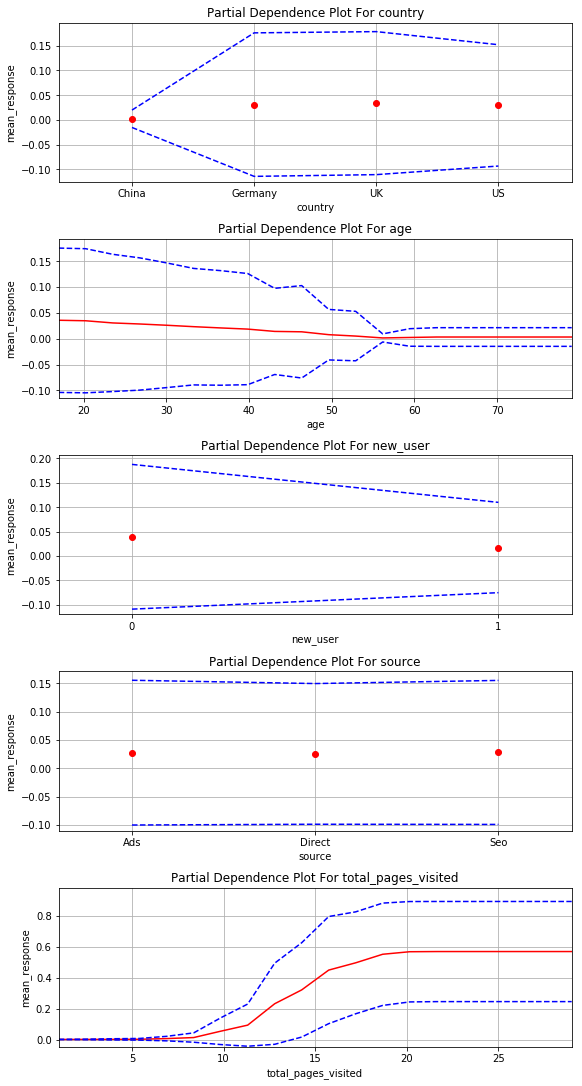

In [41]:
_ = model.partial_plot(train, cols=feature, figsize=(8, 15))
plt.show()

%matplotlib inline sets the backend of matplotlib to the 'inline' backend:

With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

In [42]:
# Shutdown h2o instance
h2o.cluster().shutdown()

H2O session _sid_92cb closed.


# Exploratory Data Analysis

In [43]:
%matplotlib inline

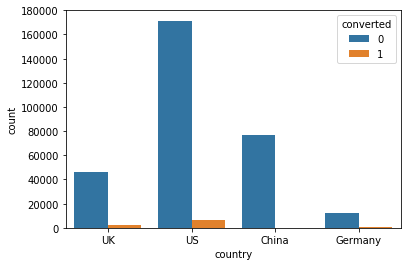

In [44]:
sns.countplot(x='country', hue='converted',data=conversiondata)
plt.show()

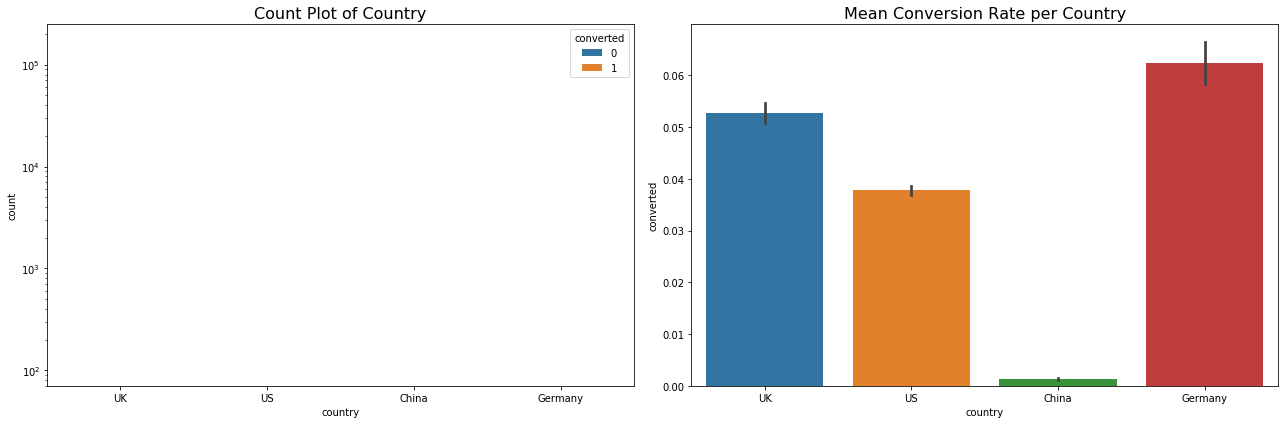

In [46]:
# Visualization of different countries
import seaborn as sns
import matplotlib.pyplot as plt
grouped = conversiondata[['country', 'converted']].groupby('country').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='country', hue='converted',data=conversiondata, ax=ax[0])
ax[0].set_title('Count Plot of Country', fontsize=16)
ax[0].set_yscale('log')
sns.barplot(x='country', y='converted', data=conversiondata, ax=ax[1]);
ax[1].set_title('Mean Conversion Rate per Country', fontsize=16)
plt.tight_layout()
plt.show()

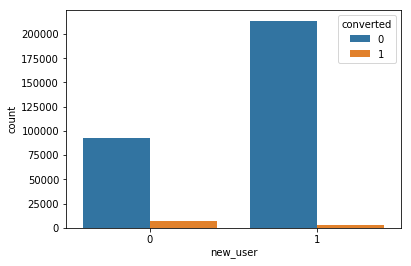

In [47]:
sns.countplot(x='new_user',hue='converted', data=conversiondata)

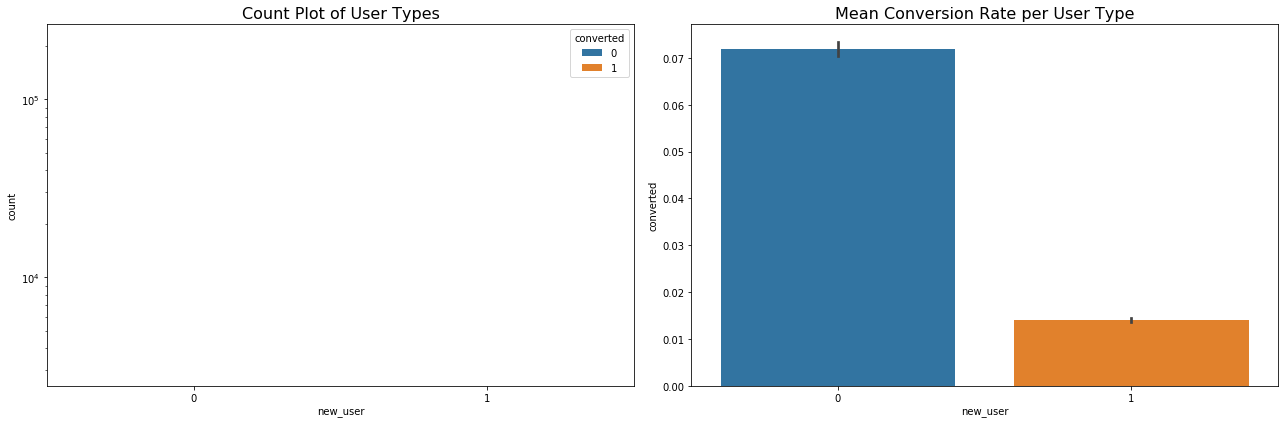

In [48]:
# Visualization of different user types
grouped = conversiondata[['new_user', 'converted']].groupby('new_user').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='new_user',hue='converted', data=conversiondata, ax=ax[0])  
ax[0].set_title('Count Plot of User Types', fontsize=16)
ax[0].set_yscale('log')
sns.barplot(x='new_user', y='converted', data=conversiondata, ax=ax[1]);
ax[1].set_title('Mean Conversion Rate per User Type', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Visualization of different sources
grouped = conversiondata[['age', 'converted']].groupby('age').mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(conversiondata[conversiondata['converted'] == 0]['age'], label='Converted 0', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(conversiondata[conversiondata['converted'] == 1]['age'], label='Converted 1', 
             ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of Age', fontsize=16)
ax[0].legend()
#ax[1].plot(grouped['age'], grouped['converted']) has the same results with following code 
ax[1].plot(grouped['age'], grouped['converted'], '.-')
ax[1].set_title('Mean Conversion Rate vs. Age', fontsize=16)
ax[1].set_xlabel('age')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True)
plt.show()

In [ ]:
# Visualization of different sources
grouped = conversiondata[['total_pages_visited', 'converted']].groupby('total_pages_visited').mean().reset_index()
print(grouped)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(conversiondata[conversiondata['converted'] == 0]['total_pages_visited'], 
             label='Converted 0', ax=ax[0], hist_kws=hist_kws)
sns.distplot(conversiondata[conversiondata['converted'] == 1]['total_pages_visited'], 
             label='Converted 1', ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of Age', fontsize=16)
ax[0].legend()
ax[1].plot(grouped['total_pages_visited'], grouped['converted'], '.-')
ax[1].set_title('Mean Conversion Rate vs. Total_pages_visited', fontsize=16)
ax[1].set_xlabel('total_pages_visited')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True)
plt.show()